# Import Library

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data Collecting

In [132]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/machineLearningPemula/refs/heads/master/Data/GlobalWeatherRepository.csv')
df

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.3300,19.8200,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.100,2.000,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.7600,3.0500,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.400,18.400,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.5000,1.5200,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.700,0.900,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.8400,13.2300,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.400,262.300,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55537,Venezuela,Caracas,10.5000,-66.9167,America/Caracas,1740564000,2025-02-26 06:00,25.1,77.2,Clear,...,17.390,23.125,2,2,06:43 AM,06:37 PM,05:36 AM,05:33 PM,Waning Crescent,5
55538,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1740564000,2025-02-26 17:00,17.2,63.0,Overcast,...,97.865,98.605,4,10,06:19 AM,06:00 PM,05:00 AM,04:17 PM,Waning Crescent,7
55539,Yemen,Sanaa,15.3547,44.2067,Asia/Aden,1740564000,2025-02-26 13:00,23.2,73.8,Sunny,...,27.380,91.020,2,3,06:22 AM,06:10 PM,05:04 AM,04:43 PM,Waning Crescent,6
55540,Zambia,Lusaka,-15.4167,28.2833,Africa/Lusaka,1740564000,2025-02-26 12:00,24.4,75.8,Light rain shower,...,9.435,10.915,1,1,06:07 AM,06:32 PM,04:20 AM,05:33 PM,Waning Crescent,6


In [133]:
df_asia = df[df["timezone"].str.contains("Asia", na=False)]

Dataset Overview
Dataset ini berisi 13.650 baris and 41 kolom.

Jumlah total kolom numerik adalah 30 kolom

Jumlah total kolom kategorikal adalah of 11 kolom

Tidak ada missing value

Tidak ada data yang duplikat di dataset ini

Jumlah kolom unik di kolom Country ada 45

# Data Cleaning

In [134]:
df_asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13650 entries, 0 to 55539
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  wind_d

In [135]:
df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\129879787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['last_updated'] = pd.to_datetime(df_asia['last_updated'])


In [136]:
df_asia.describe()

,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,13650.000000,13650.000000,1.365000e+04,13650,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,...,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000
mean,26.294177,77.737101,1.728267e+09,2024-10-07 07:45:06.065934080,23.956989,75.124176,7.677934,12.359495,194.665495,1011.667473,...,17.857465,953.769368,74.863048,29.615221,28.260789,40.922215,86.989501,2.205641,3.911868,49.448132
min,-8.560000,33.366700,1.715849e+09,2024-05-16 11:45:00,-24.900000,-12.800000,2.200000,3.600000,1.000000,984.000000,...,3.600000,116.000000,0.000000,0.000000,0.000000,0.500000,-1848.150000,1.000000,1.000000,0.000000
25%,16.783300,47.960000,1.722171e+09,2024-07-28 19:18:45,18.800000,65.800000,3.800000,6.100000,102.000000,1007.000000,...,9.900000,281.200000,40.100000,3.425000,2.960000,11.800000,18.700000,1.000000,1.000000,15.000000
50%,29.366700,73.170000,1.728294e+09,2024-10-07 16:45:00,26.400000,79.600000,6.500000,10.400000,202.000000,1010.000000,...,15.300000,474.000000,71.000000,14.245000,13.505000,25.160000,40.300000,2.000000,3.000000,50.000000
75%,37.566400,104.916700,1.734432e+09,2024-12-17 19:07:30,30.900000,87.600000,10.500000,16.900000,290.000000,1017.000000,...,23.700000,928.237500,102.000000,44.585000,37.200000,48.840000,82.507500,3.000000,6.000000,83.000000
max,51.181100,139.691700,1.740564e+09,2025-02-26 19:00:00,49.200000,120.600000,42.900000,69.100000,360.000000,3000.000000,...,96.300000,38879.398000,480.700000,427.700000,486.180000,874.900000,6037.290000,6.000000,10.000000,100.000000
std,14.459617,30.512448,7.166239e+06,NaN,10.887545,19.597728,4.937598,7.942805,105.396145,18.804986,...,10.772224,1698.941623,48.630234,36.928345,40.247870,54.372275,268.741634,1.172679,3.163146,34.862719


#### Mengidentifikasi typo pada colom country
Beberapa negara memiliki typo nama namun masih mengarah ke negara yang terdaftar

In [137]:
df_asia['country'].value_counts()

country
Indonesia                           573
Iran                                570
Thailand                            569
Vietnam                             522
Armenia                             286
Japan                               286
Iraq                                286
Jordan                              286
Myanmar                             286
Bahrain                             286
Uzbekistan                          286
Malaysia                            286
United Arab Emirates                286
Oman                                286
Singapore                           286
Kuwait                              286
Afghanistan                         286
Bhutan                              285
Azerbaijan                          285
Syria                               285
South Korea                         285
Israel                              285
Kazakhstan                          285
Cambodia                            285
China                           

In [138]:
df_asia['country'] = df_asia['country'].replace('Inde', 'India')
df_asia['country'] = df_asia['country'].replace('Jemen', 'Yemen')
df_asia['country'] = df_asia['country'].replace('Südkorea', 'South Korea')
df_asia['country'] = df_asia['country'].replace('Turkménistan', 'Turkmenistan')
df_asia['country'] = df_asia['country'].replace('Saudi Arabien', 'Saudi Arabia')
df_asia['country'] = df_asia['country'].replace('Malásia', 'Malaysia')

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\3920227049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['country'] = df_asia['country'].replace('Inde', 'India')
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\3920227049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['country'] = df_asia['country'].replace('Jemen', 'Yemen')
C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\3920227049.py:3: SettingWithCopyWarning: 
A value is trying to 

In [139]:
missing_values = df_asia.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [140]:
print(f'Data yang terduplikasi: {df_asia.duplicated().sum()}')

Data yang terduplikasi: 0


In [141]:
# df_asia.to_csv('asia_df.csv', index=False)

# EDA dan Visualization

In [142]:
df_asia

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
7,Armenia,Yerevan,40.1800,44.5100,Asia/Yerevan,1715849100,2024-05-16 12:45:00,19.0,66.2,Partly cloudy,...,0.800,0.900,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
10,Azerbaijan,Baku,40.4000,49.8800,Asia/Baku,1715849100,2024-05-16 12:45:00,17.0,62.6,Partly cloudy,...,1.900,2.200,1,1,05:23 AM,07:51 PM,12:54 PM,02:10 AM,Waxing Gibbous,55
12,Bahrain,Manama,26.2400,50.5800,Asia/Bahrain,1715849100,2024-05-16 11:45:00,36.0,96.8,Sunny,...,39.000,114.300,2,4,04:50 AM,06:18 PM,12:10 PM,12:45 AM,Waxing Gibbous,55
13,Bangladesh,Dhaka,23.7200,90.4100,Asia/Dhaka,1715849100,2024-05-16 14:45:00,38.4,101.2,Partly Cloudy,...,49.700,57.000,3,6,05:16 AM,06:34 PM,12:28 PM,12:58 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55527,Turkmenistan,Ashgabat,37.9500,58.3833,Asia/Ashgabat,1740564000,2025-02-26 15:00:00,8.4,47.1,Sunny,...,26.270,37.555,2,3,07:43 AM,06:57 PM,06:53 AM,05:02 PM,Waning Crescent,7
55531,United Arab Emirates,Abu Dhabi,24.4667,54.3667,Asia/Dubai,1740564000,2025-02-26 14:00:00,21.1,70.0,Partly cloudy,...,28.490,43.475,2,3,06:47 AM,06:23 PM,05:39 AM,04:46 PM,Waning Crescent,6
55535,Uzbekistan,Tashkent,41.3167,69.2500,Asia/Tashkent,1740564000,2025-02-26 15:00:00,4.2,39.6,Partly cloudy,...,5.735,5.920,1,1,07:02 AM,06:10 PM,06:18 AM,04:08 PM,Waning Crescent,7
55538,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1740564000,2025-02-26 17:00:00,17.2,63.0,Overcast,...,97.865,98.605,4,10,06:19 AM,06:00 PM,05:00 AM,04:17 PM,Waning Crescent,7


In [143]:
df_asia.describe()

,latitude,longitude,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,13650.000000,13650.000000,1.365000e+04,13650,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,...,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000,13650.000000
mean,26.294177,77.737101,1.728267e+09,2024-10-07 07:45:06.065934080,23.956989,75.124176,7.677934,12.359495,194.665495,1011.667473,...,17.857465,953.769368,74.863048,29.615221,28.260789,40.922215,86.989501,2.205641,3.911868,49.448132
min,-8.560000,33.366700,1.715849e+09,2024-05-16 11:45:00,-24.900000,-12.800000,2.200000,3.600000,1.000000,984.000000,...,3.600000,116.000000,0.000000,0.000000,0.000000,0.500000,-1848.150000,1.000000,1.000000,0.000000
25%,16.783300,47.960000,1.722171e+09,2024-07-28 19:18:45,18.800000,65.800000,3.800000,6.100000,102.000000,1007.000000,...,9.900000,281.200000,40.100000,3.425000,2.960000,11.800000,18.700000,1.000000,1.000000,15.000000
50%,29.366700,73.170000,1.728294e+09,2024-10-07 16:45:00,26.400000,79.600000,6.500000,10.400000,202.000000,1010.000000,...,15.300000,474.000000,71.000000,14.245000,13.505000,25.160000,40.300000,2.000000,3.000000,50.000000
75%,37.566400,104.916700,1.734432e+09,2024-12-17 19:07:30,30.900000,87.600000,10.500000,16.900000,290.000000,1017.000000,...,23.700000,928.237500,102.000000,44.585000,37.200000,48.840000,82.507500,3.000000,6.000000,83.000000
max,51.181100,139.691700,1.740564e+09,2025-02-26 19:00:00,49.200000,120.600000,42.900000,69.100000,360.000000,3000.000000,...,96.300000,38879.398000,480.700000,427.700000,486.180000,874.900000,6037.290000,6.000000,10.000000,100.000000
std,14.459617,30.512448,7.166239e+06,NaN,10.887545,19.597728,4.937598,7.942805,105.396145,18.804986,...,10.772224,1698.941623,48.630234,36.928345,40.247870,54.372275,268.741634,1.172679,3.163146,34.862719


In [144]:
df_asia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13650 entries, 0 to 55539
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       13650 non-null  object        
 1   location_name                 13650 non-null  object        
 2   latitude                      13650 non-null  float64       
 3   longitude                     13650 non-null  float64       
 4   timezone                      13650 non-null  object        
 5   last_updated_epoch            13650 non-null  int64         
 6   last_updated                  13650 non-null  datetime64[ns]
 7   temperature_celsius           13650 non-null  float64       
 8   temperature_fahrenheit        13650 non-null  float64       
 9   condition_text                13650 non-null  object        
 10  wind_mph                      13650 non-null  float64       
 11  wind_kph                      136

In [145]:
numeric_features = df_asia.select_dtypes(include='number').shape[1]
category_features = df_asia.select_dtypes(include='object').shape[1]


print(f'Jumlah Kolom Numeric: {numeric_features}')
print(f'Jumlah kolom kategori: {category_features}')
print(f'Dimensi dataset : {df_asia.shape}')

numeric_features = df_asia.select_dtypes(include='number').columns
category_features = df_asia.select_dtypes(include='object').columns


Jumlah Kolom Numeric: 30
Jumlah kolom kategori: 10
Dimensi dataset : (13650, 41)


In [146]:
print(f'jumlah country di asia {df_asia['country'].nunique()}')

jumlah country di asia 45


distribusi kolom suhu dan cuaca

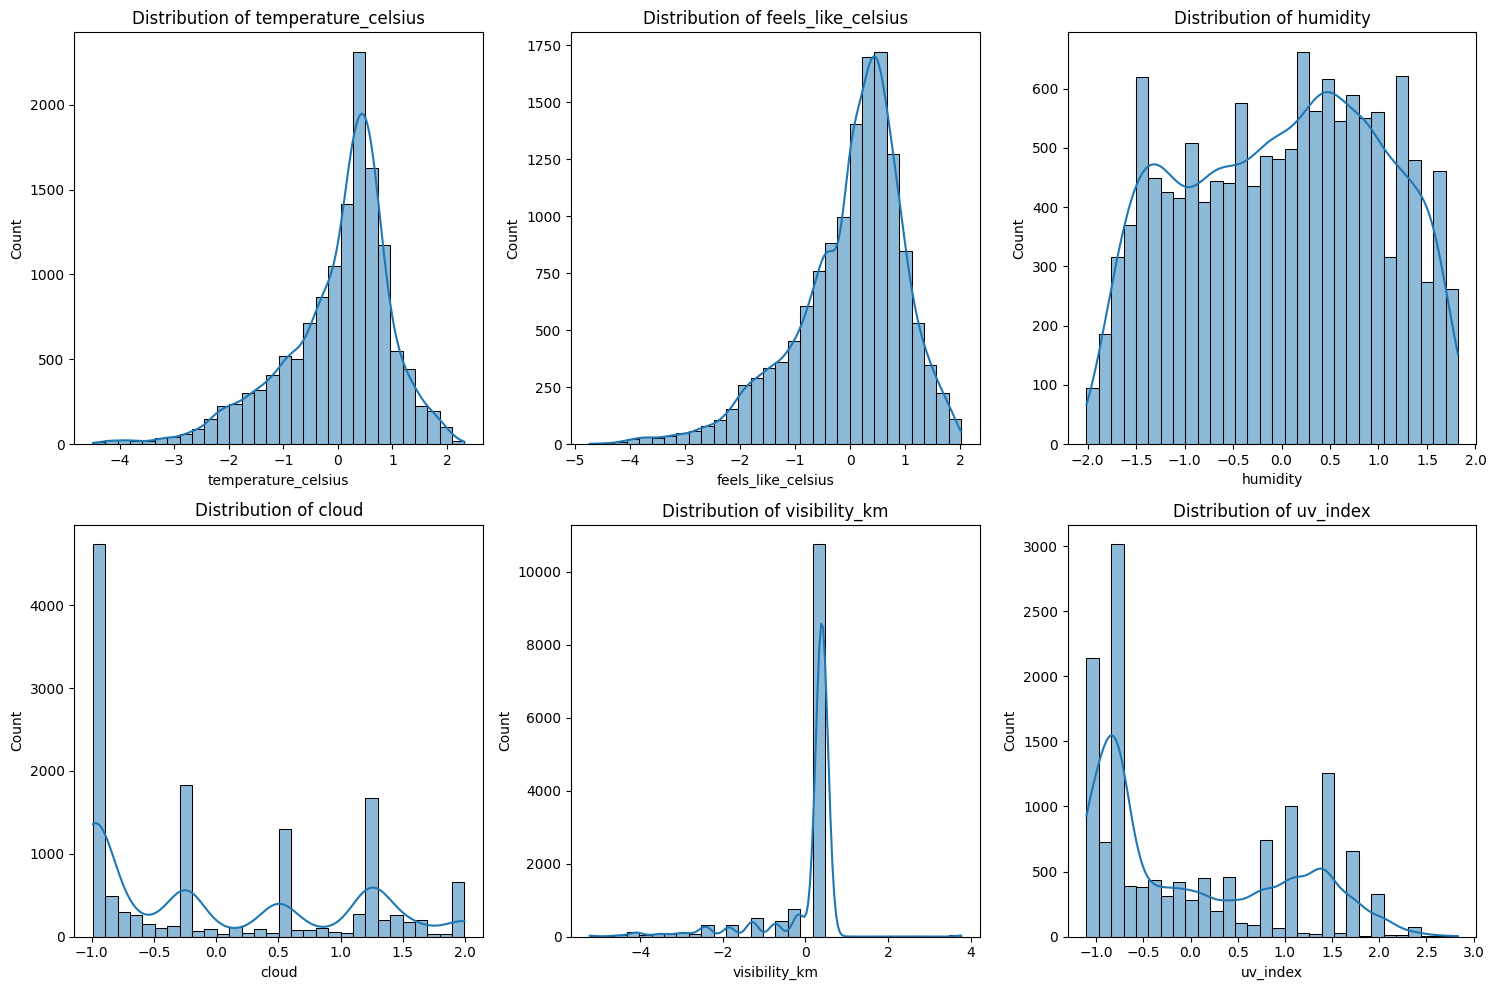

In [208]:
# Distribusi suhu dan cuaca
suhu_cuaca = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'cloud', 'visibility_km', 'uv_index']

plt.figure(figsize=(15,10))

for i, column in enumerate(suhu_cuaca, 1):
  plt.subplot(2,3,i)
  sns.histplot(df_asia[column], kde=True, bins=30)
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Distribusi angin dan tekanan udara

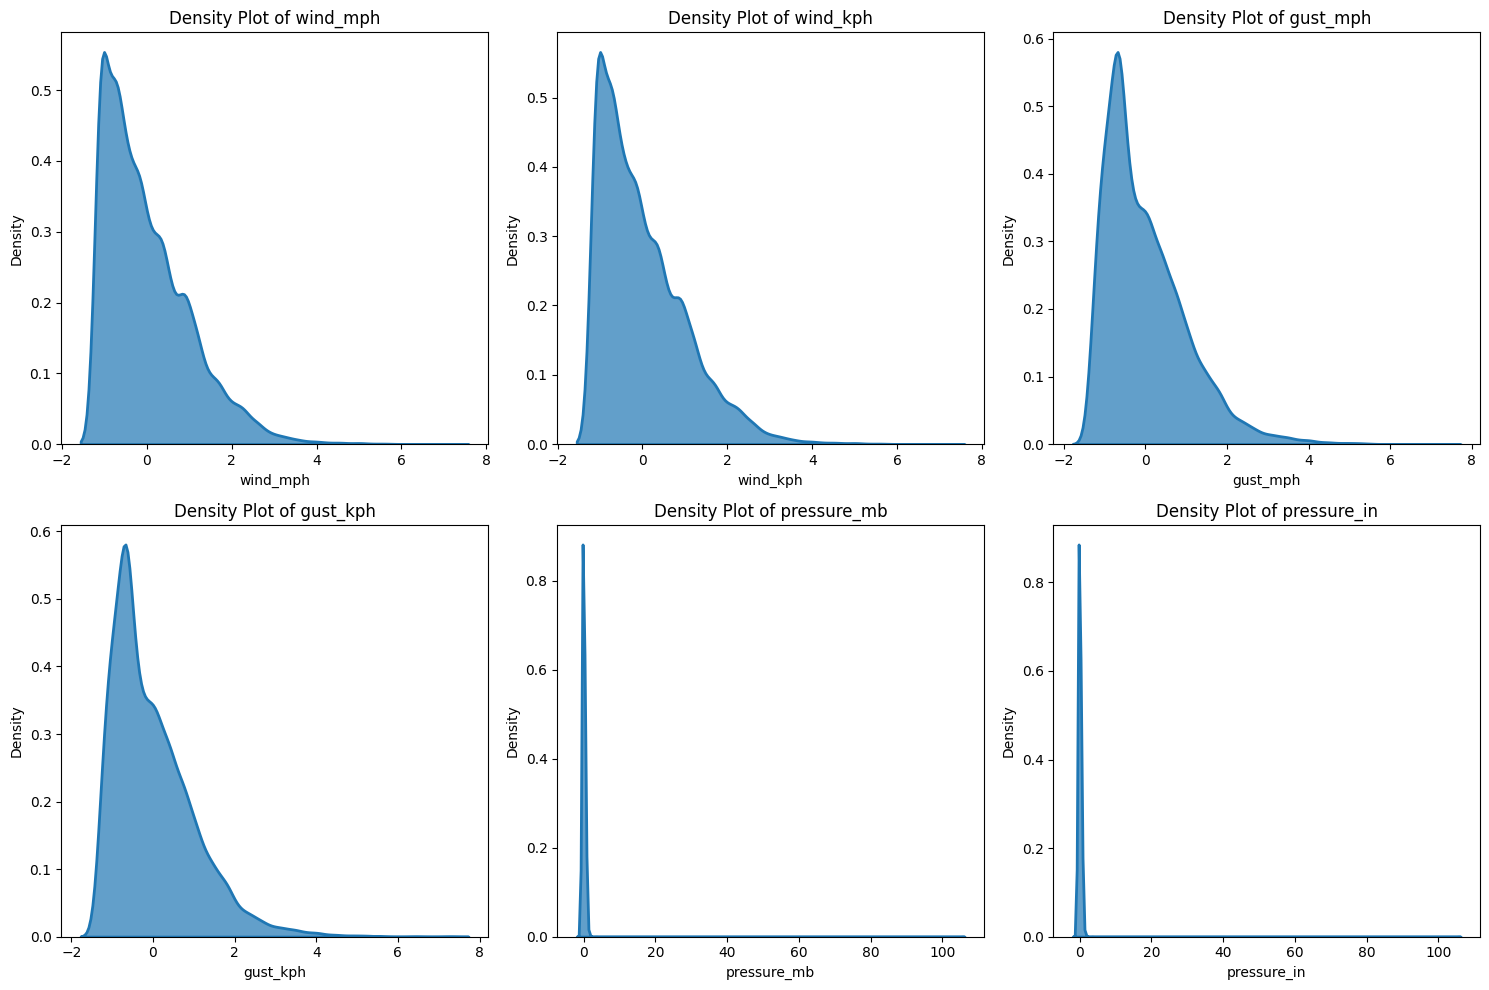

In [205]:
# Distribusi angin dan tekanan udara
angin_udara = ['wind_mph', 'wind_kph', 'gust_mph', 'gust_kph', 'pressure_mb', 'pressure_in']

plt.figure(figsize=(15, 10))

for i, column in enumerate(angin_udara, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df_asia[column], fill=True, alpha=0.7, linewidth=2)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


Distribusi polotan

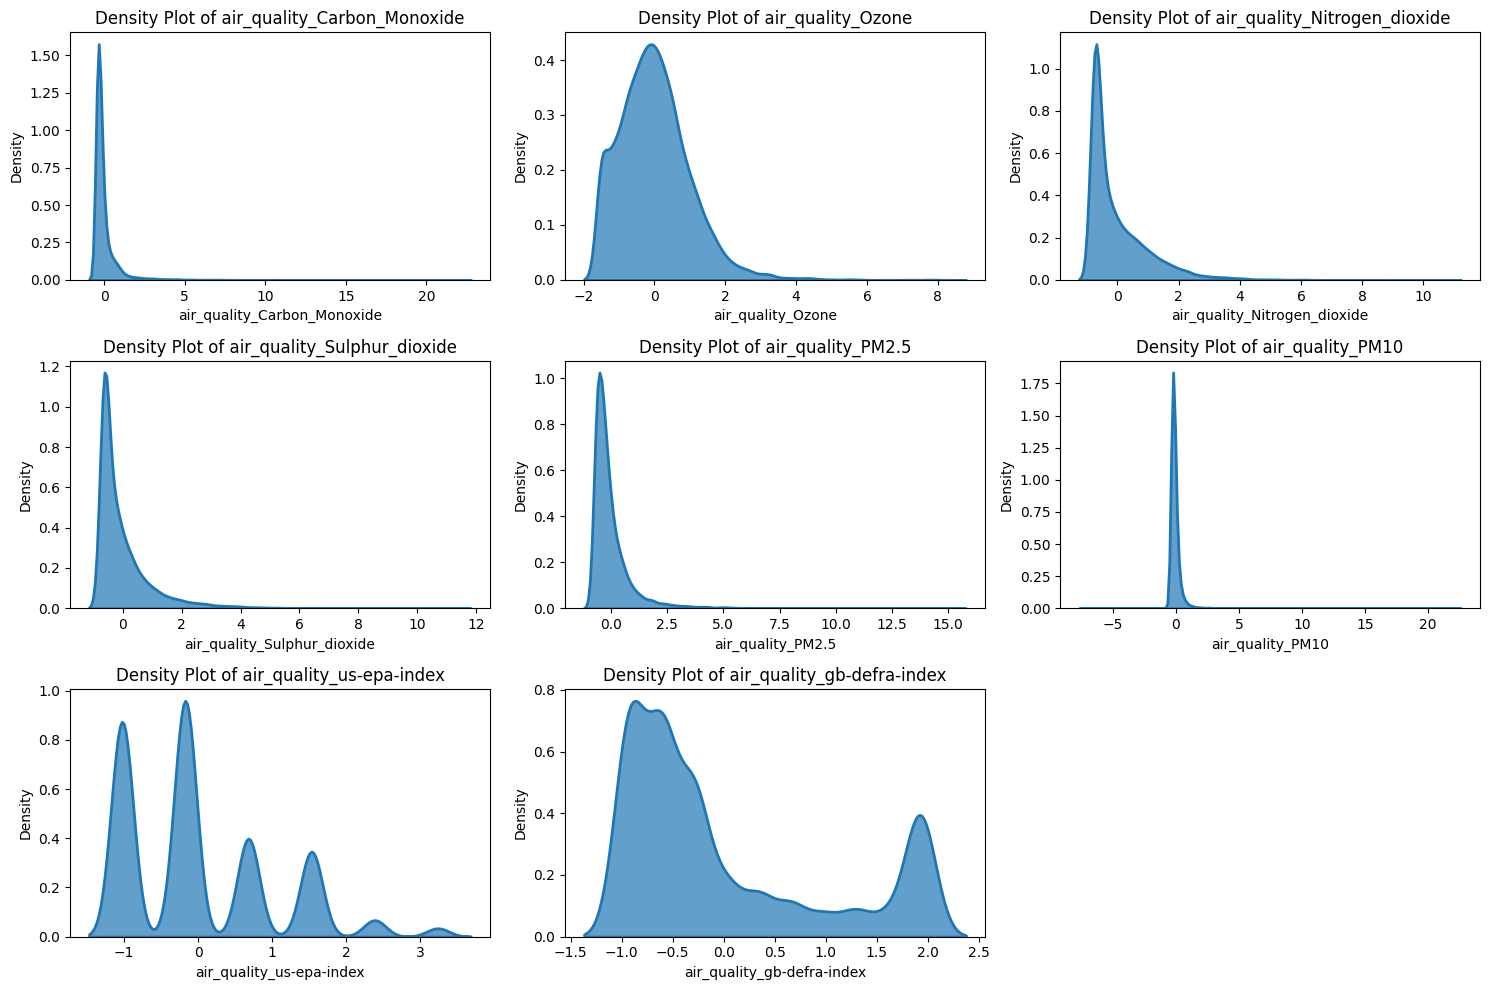

In [207]:
# Distribusi Polutan
polutan = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',  'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',  'air_quality_us-epa-index', 'air_quality_gb-defra-index']

plt.figure(figsize=(15, 10))

for i, column in enumerate(polutan, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(df_asia[column], fill=True, alpha=0.7, linewidth=2)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


## Bisnis Question

### 1 Bagaimana tren suhu rata-rata bulanan di Asia?
Untuk mendapatkan datanya, kita dapat menggunakan rata-rata kolom temperature_celcius untuk mengukur rata-rata suhu perbulannya.

In [150]:
monthly_trend = df_asia.resample(rule='M', on='last_updated').agg({
    'temperature_celsius' : 'mean'
}).reset_index()

monthly_trend.index = monthly_trend['last_updated'].dt.strftime('%B')
monthly_trend.drop(columns=['last_updated'], inplace=True)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_trend.index = pd.Categorical(monthly_trend.index, categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_index()
monthly_trend

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\2785597916.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df_asia.resample(rule='M', on='last_updated').agg({


,temperature_celsius
January,15.801614
February,16.310817
May,26.660100
June,30.003696
July,30.748759
August,30.356452
September,28.793329
October,25.050437
November,20.860042
December,15.926949


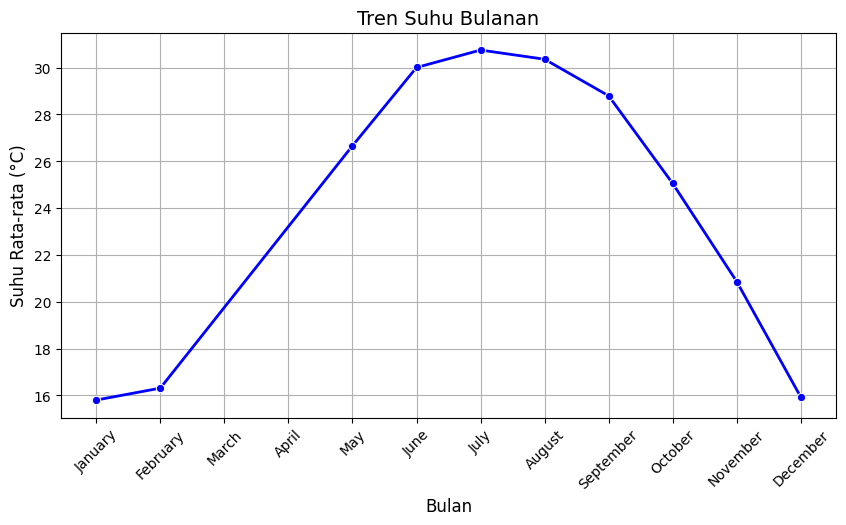

In [151]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend['temperature_celsius'], marker='o', linewidth=2, color='b')

plt.title('Tren Suhu Bulanan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Suhu Rata-rata (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Apa yang dapat kita lihat dari grafik ini tentang tren suhu bulanan?

-Suhu rata-rata tertinggi pernah tercatat di bulan Juli

-Suhu rata-rata tertinggi tersebut mencapai 30,74 derajat celcius

-Suhu rata-rata terendah pernah tercatat ada di bulan Januari

-suhu rata-rata terendah tersebut mencapai 15,8 derajat celcius

### 2. Negara mana yang memiliki kualitas udara terburuk?
Untuk mendapatkan datanya, kita dapat menggunakan rata-rata kolom air_quality_us-epa-index untuk mengukur rata-rata kualitas udara berdasarkan standar US di negara-negara Asia

In [191]:
air_quality = df.groupby('country')['air_quality_us-epa-index'].mean().sort_values(ascending=False).reset_index()
air_quality.head(10)

,country,air_quality_us-epa-index
0,China,4.154386
1,Chile,4.081272
2,Südkorea,4.000000
3,India,3.760563
4,Saudi Arabia,3.422535
5,Kuwait,3.370629
6,Malaysia,3.174825
7,Bahrain,3.174825
8,Bangladesh,3.066667
9,Pakistan,3.056140


C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\1996337628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=air_quality.values, y=air_quality.index, palette="Reds_r")


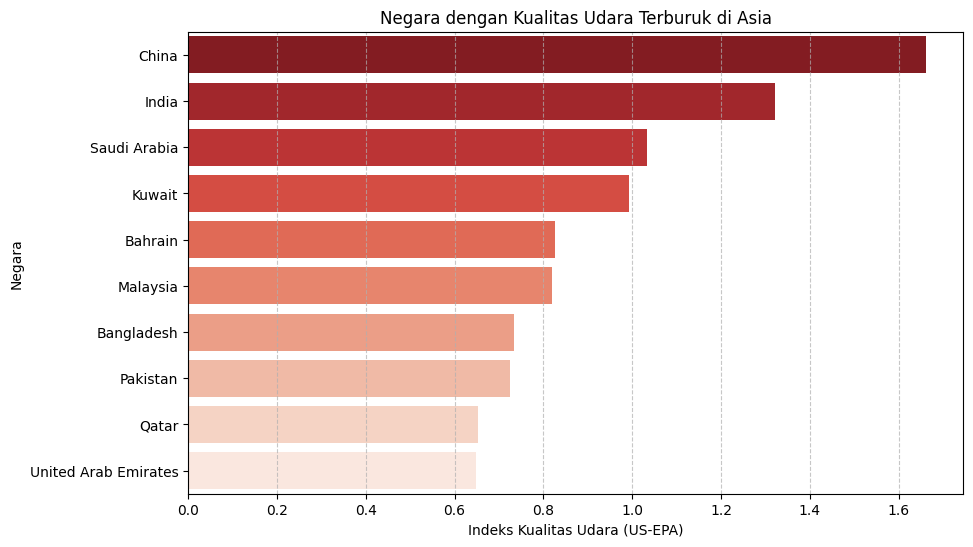

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=air_quality.values, y=air_quality.index, palette="Reds_r")
plt.xlabel("Indeks Kualitas Udara (US-EPA)")
plt.ylabel("Negara")
plt.title("Negara dengan Kualitas Udara Terburuk di Asia")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Dari visualisasi ini kita dapat melihat :

China menjadi negara dengan kualitas udara paling buruk di Asia

Diukur dengan Indeks Kualitas Udara US angkanya mencapai 4,1

### 3. Cuaca apa yang sering terjadi di negara Asia?
Untuk mendapatkan visualisasinya, kita dapat menggunakan kolom condition_text yang merupakan kolom kategorikal untuk mengukur cuaca yang sering terjadi di negara-negara Asia

In [154]:
weather_counts = df_asia['condition_text'].value_counts().reset_index()

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\550877012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_counts, x='count', y='condition_text', palette='pastel')


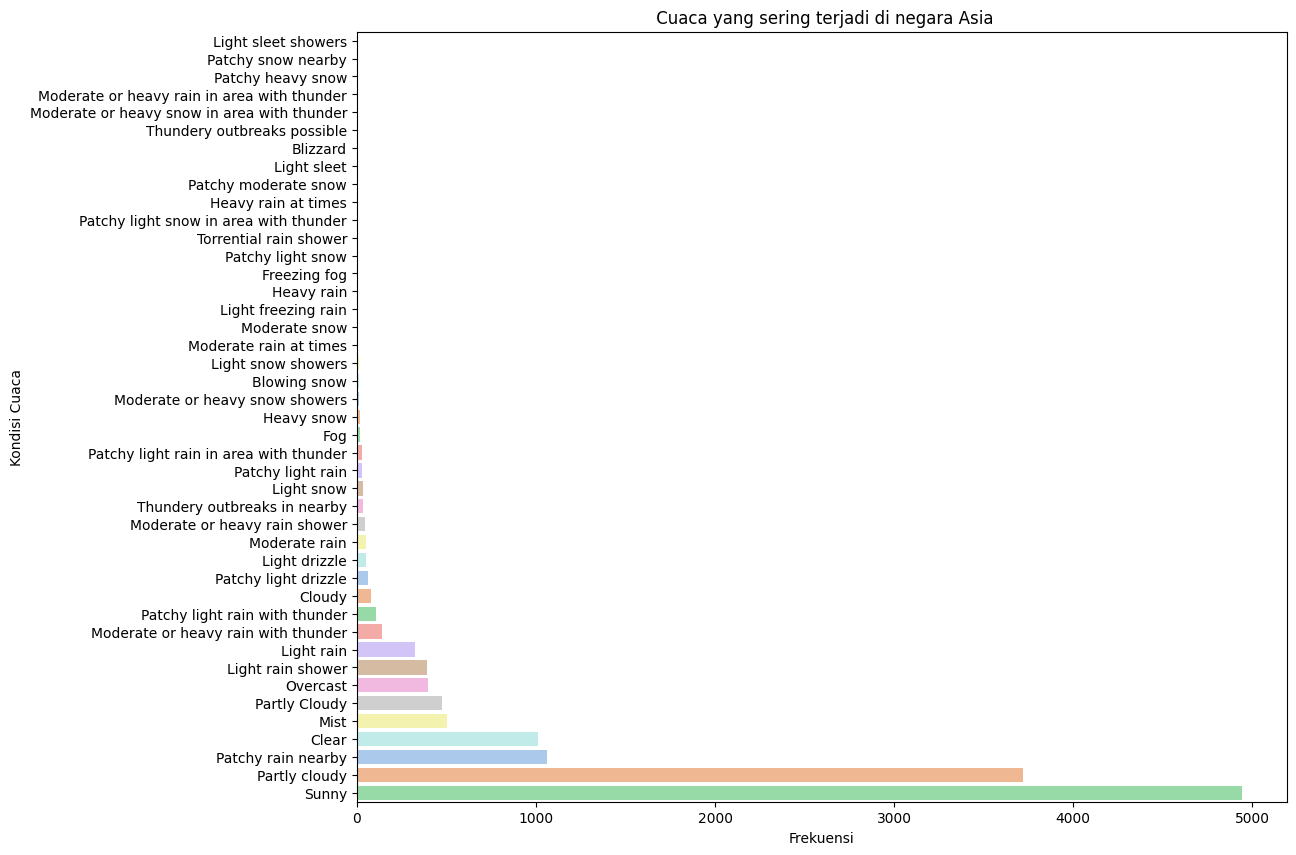

In [182]:
plt.figure(figsize=(12, 10))
sns.barplot(data=weather_counts, x='count', y='condition_text', palette='pastel')
plt.xlabel("Frekuensi")
plt.ylabel("Kondisi Cuaca")
plt.title(" Cuaca yang sering terjadi di negara Asia")
plt.show()


Berdasarkan visualisasi ini, cuaca yang paling sering terjadi di negara-negara di Asia adalah Sunny atau cerah

### 4 Negara mana yang memiliki rata rata kecepatan angin trbesar?
Untuk mendapatkan visualisasinya, kita dapat menggunakan kolom wind_kph untuk mengukur rata-rata kecepatan angin yang terbesar yang ada di negara-negara Asia

In [156]:
wind_speed = df_asia.groupby('country')['wind_kph'].mean().sort_values(ascending=False).reset_index()
wind_speed.head(10)

,country,wind_kph
0,Azerbaijan,23.096842
1,Bahrain,19.946503
2,Qatar,18.692982
3,Kazakhstan,17.942456
4,Jordan,17.905245
5,United Arab Emirates,17.726224
6,Israel,17.104912
7,Iraq,16.889860
8,Japan,16.496853
9,Sri Lanka,16.448772


C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\528854121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wind_speed.head(10), x="wind_kph", y="country", palette="Blues_r"  )


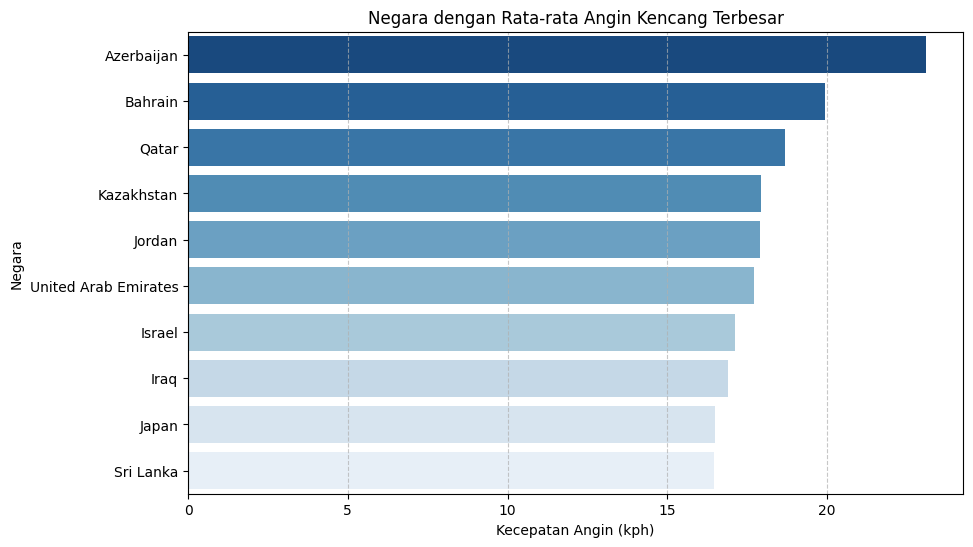

In [200]:
plt.figure(figsize=(10, 6))
sns.barplot(data=wind_speed.head(10), x="wind_kph", y="country", palette="Blues_r"  )

plt.xlabel("Kecepatan Angin (kph)")
plt.ylabel("Negara")
plt.title("Negara dengan Rata-rata Angin Kencang Terbesar")
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.show()


Visualisasi ini menunjukkan negara Azerbaijan sebagai negara dengan rata-rata kecepatan angin terbesar dengan angka 23,09

### 5.  Bagaimana hubungan antara tingkat kelembapan dan suhu yang terasa di berbagai negara Asia?

In [158]:
humidity_temp = df_asia.groupby('country')[['humidity', 'temperature_celsius', 'feels_like_celsius']].mean().reset_index()
humidity_temp.columns = ['Negara', 'Rata-rata Kelembapan (%)', 'Rata-rata Suhu (°C)', 'Rata-rata Suhu Terasa (°C)']
humidity_temp

,Negara,Rata-rata Kelembapan (%),Rata-rata Suhu (°C),Rata-rata Suhu Terasa (°C)
0,Afghanistan,28.545455,18.761538,17.699650
1,Armenia,38.111888,18.808042,18.173077
2,Azerbaijan,59.445614,19.434737,18.838246
3,Bahrain,51.370629,30.201399,33.587063
4,Bangladesh,52.943860,29.565614,32.348772
5,Bhutan,73.691228,11.547368,11.025614
6,Brunei Darussalam,84.217544,27.988421,33.382456
7,Cambodia,69.985965,30.165614,33.644211
8,China,48.056140,15.905614,15.660351
9,Cyprus,45.280702,26.293684,27.236491


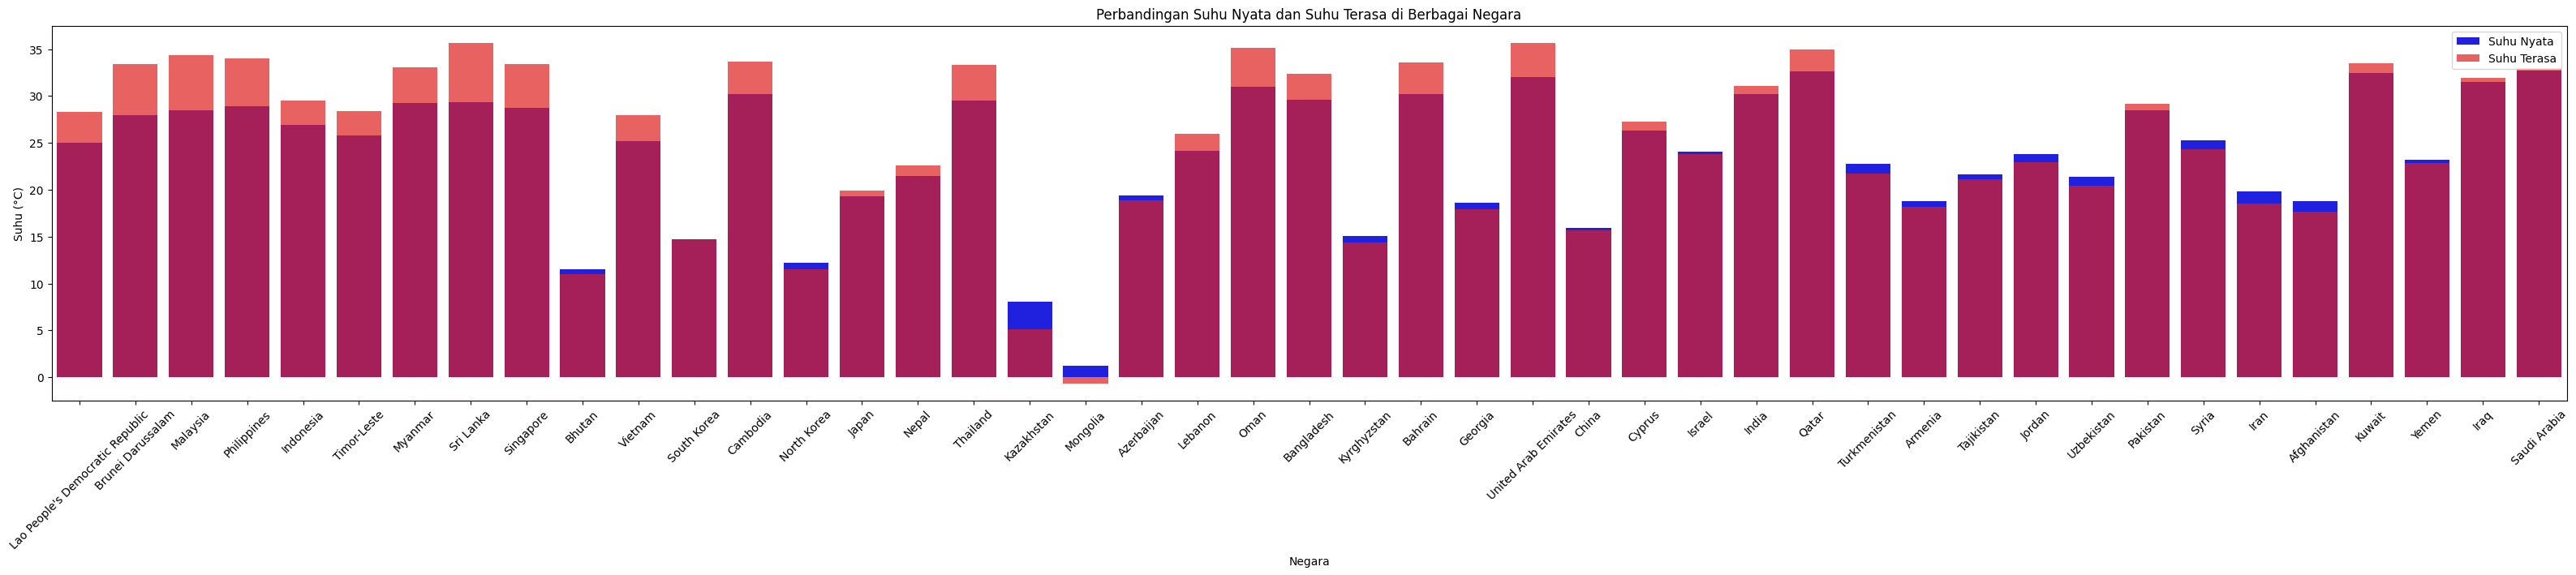

In [159]:
plt.figure(figsize=(40, 6))
sns.barplot(data=humidity_temp.sort_values('Rata-rata Kelembapan (%)', ascending=False), 
            x='Negara', y='Rata-rata Suhu (°C)', color='blue', label="Suhu Nyata")
sns.barplot(data=humidity_temp.sort_values('Rata-rata Kelembapan (%)', ascending=False), 
            x='Negara', y='Rata-rata Suhu Terasa (°C)', color='red', alpha=0.7, label="Suhu Terasa")

plt.xlabel("Negara")
plt.ylabel("Suhu (°C)")
plt.title("Perbandingan Suhu Nyata dan Suhu Terasa di Berbagai Negara")
plt.xticks(rotation=45)
plt.legend()
plt.show()


Berdasarkan data ini kita bisa melihat korelasi dari kelembapan itu sendiri terhadap suhu nyata dan suhu yang terasa oleh kita.

United Emirates Arab menjadi negara dengan tingkat kelembapan paling rendah, karena suhu yang terasa lebih tinggi dibandingkan suhu nyatanya, dimana itu artinya sangat panas

Sedangkan, Mongolia menjadi negara dengan tingkat kelembapan paling tinggi, karena suhu yang terasa itu lebih rendah dibadingkan dengan suhu nyatanya, kelembapan yang tinggi tersebut membuatnya sangat dingin.

### 6.Negara mana yang memiliki curah hujan tertinggi?
Untuk mendapatkan visualisasinya, kita dapat menggunakan kolom precip_mm untuk mengukur curah hujan yang tersebar di negara-negara Asia dengan menggunakan rata-ratanya

In [160]:
rainfall = df.groupby('country')['precip_mm'].mean().sort_values(ascending=False).reset_index()
rainfall.head(10)

,country,precip_mm
0,Lao People's Democratic Republic,1.970000
1,Letonia,1.830000
2,Malásia,1.550000
3,Brunei Darussalam,0.580281
4,Malaysia,0.580070
5,USA United States of America,0.530000
6,Sierra Leone,0.521338
7,Sri Lanka,0.508105
8,Guyana,0.470318
9,Indonesia,0.468115


C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\2159365058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rainfall.head(10), x="precip_mm",  y="country", palette="coolwarm")


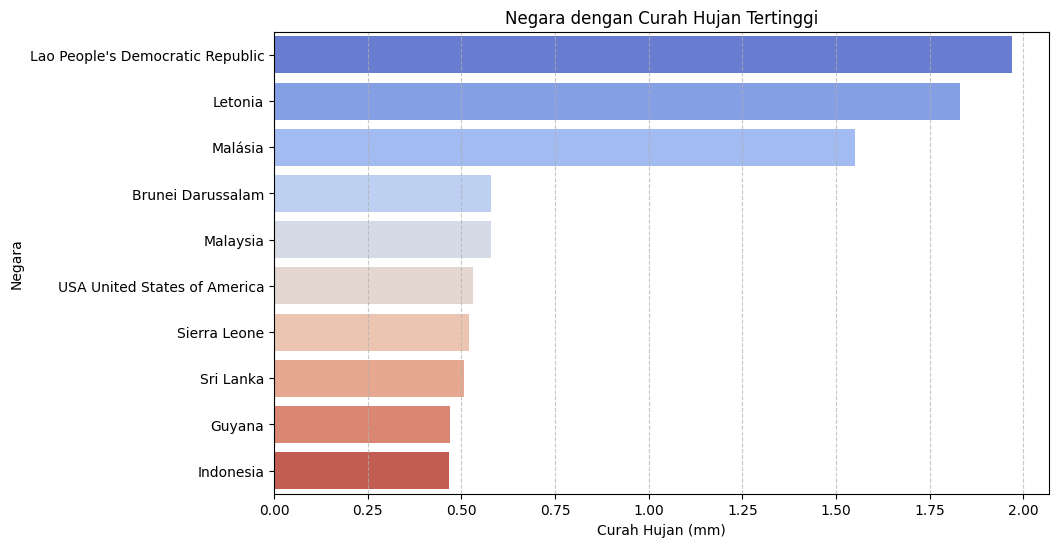

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=rainfall.head(10), x="precip_mm",  y="country", palette="coolwarm")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("Negara")
plt.title("Negara dengan Curah Hujan Tertinggi")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Berdasarkan visualisasi ini, Lao People's Democratic Republic menjadi negara dengan rata-rata curah hujan tertinggi.

angkanya sendiri mencapai 1.97

### 7. Bagaimana pengaruh fase bulan terhadap suhu rata-rata?
Untuk mencoba mendapatkan pengaruhnya, kita bisa menggunakan kolom moon_phase dan temperature_celcius untuk menghitung rata-rata suhu dipengaruhi oleh fase bulan atau tidak.

In [162]:
df.groupby('moon_phase')['temperature_celsius'].mean().reset_index()


,moon_phase,temperature_celsius
0,First Quarter,21.991453
1,Full Moon,21.956269
2,Last Quarter,22.045697
3,New Moon,22.645253
4,Waning Crescent,22.129017
5,Waning Gibbous,21.902251
6,Waxing Crescent,22.832917
7,Waxing Gibbous,22.743798


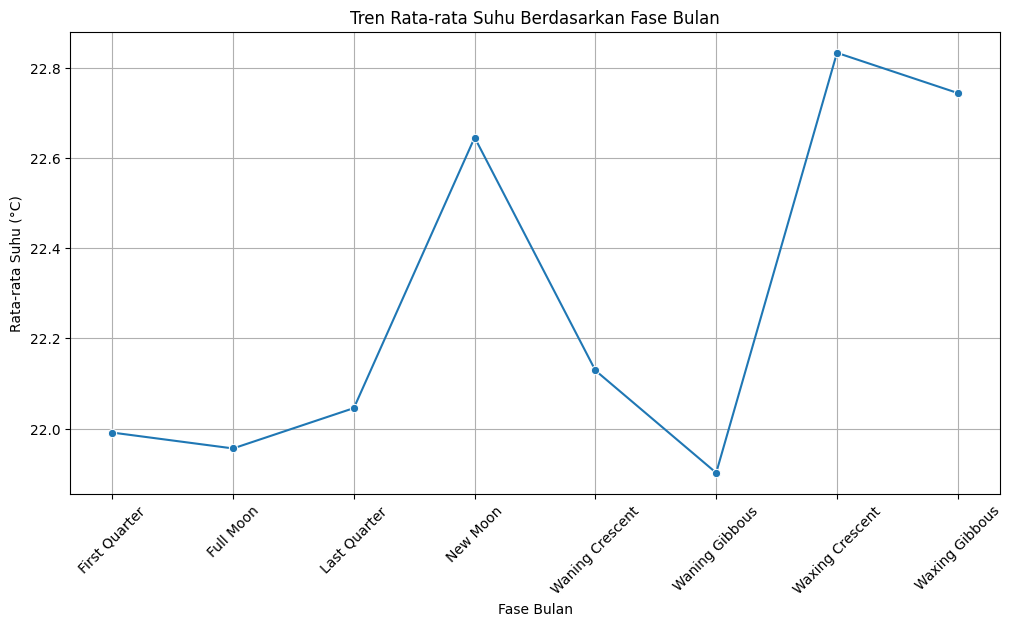

In [163]:
plt.figure(figsize=(12, 6))
avg_temp_per_moon_phase = df.groupby('moon_phase')['temperature_celsius'].mean().reset_index()
sns.lineplot(x='moon_phase', y='temperature_celsius', data=avg_temp_per_moon_phase, marker='o', linestyle='-')
plt.xlabel("Fase Bulan")
plt.ylabel("Rata-rata Suhu (°C)")
plt.title("Tren Rata-rata Suhu Berdasarkan Fase Bulan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Fase bulan ini masing-masing berbeda, dan yang kita lihat adalah

Pada fase bulan Waning Gibbous, rata-rata suhu menjadi sangat rendah

Pada fase bulan Waxing Crescent, rata-rata suhu menjadi sangat tinggi

In [164]:
# numeric_features = df_asia.select_dtypes(include='number').columns

# total_features = len(numeric_features)
# n_cols = 2
# n_rows = -(-total_features // n_cols)

# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
# axes = axes.flatten()

# for i, feature in enumerate(numeric_features):
#     sns.boxplot(x=df_asia[feature], ax=axes[i])
#     axes[i].set_title(feature)

# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

# Data Preprocesing

In [165]:
scaler = StandardScaler()
df_asia[numeric_features] = scaler.fit_transform(df_asia[numeric_features])

C:\Users\Ahmad Mafaza Afnani\AppData\Local\Temp\ipykernel_30744\742448879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia[numeric_features] = scaler.fit_transform(df_asia[numeric_features])


In [166]:
LabelEncoder = LabelEncoder()
fix_asia_lencoder = pd.DataFrame(df_asia)

category_features = df_asia.select_dtypes(include='object').columns

for col in category_features:
    fix_asia_lencoder[col] = LabelEncoder.fit_transform(df_asia[col])
    
fix_asia_lencoder

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,0,28,0.568903,-0.280457,21,-1.732959,2024-05-16 13:15:00,0.242764,0.238599,27,...,-0.598162,-0.224720,-1.028146,-0.920594,56,163,1345,22,7,0.159255
7,1,60,0.960353,-1.089009,44,-1.732959,2024-05-16 12:45:00,-0.455307,-0.455385,28,...,-0.737944,-0.320355,-1.028146,-0.920594,111,245,35,182,7,0.159255
10,2,6,0.975568,-0.913008,6,-1.732959,2024-05-16 12:45:00,-0.639009,-0.639086,28,...,-0.717712,-0.315517,-1.028146,-0.920594,89,224,1429,140,7,0.159255
12,3,36,-0.003747,-0.890066,5,-1.732959,2024-05-16 11:45:00,1.106168,1.106078,39,...,-0.035354,0.101627,-0.175367,0.027863,56,131,1341,1407,7,0.159255
13,4,18,-0.178032,0.415351,13,-1.732959,2024-05-16 14:45:00,1.326611,1.330602,27,...,0.161445,-0.111596,0.677413,0.660168,82,147,1377,1433,7,0.159255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55527,40,3,0.806124,-0.634315,3,1.715964,2025-02-26 15:00:00,-1.428932,-1.430023,39,...,-0.269489,-0.183955,-0.175367,-0.288289,229,170,706,482,4,-1.217624
55531,41,0,-0.126390,-0.765958,15,1.715964,2025-02-26 14:00:00,-0.262419,-0.261477,28,...,-0.228658,-0.161925,-0.175367,-0.288289,173,136,558,452,4,-1.246309
55535,42,52,1.038968,-0.278162,37,1.715964,2025-02-26 15:00:00,-1.814708,-1.812734,28,...,-0.647177,-0.301674,-1.028146,-0.920594,188,123,636,377,4,-1.217624
55538,43,22,-0.363846,0.921392,7,1.715964,2025-02-26 17:00:00,-0.620639,-0.618675,26,...,1.047314,0.043223,1.530193,1.924778,145,113,480,394,4,-1.217624


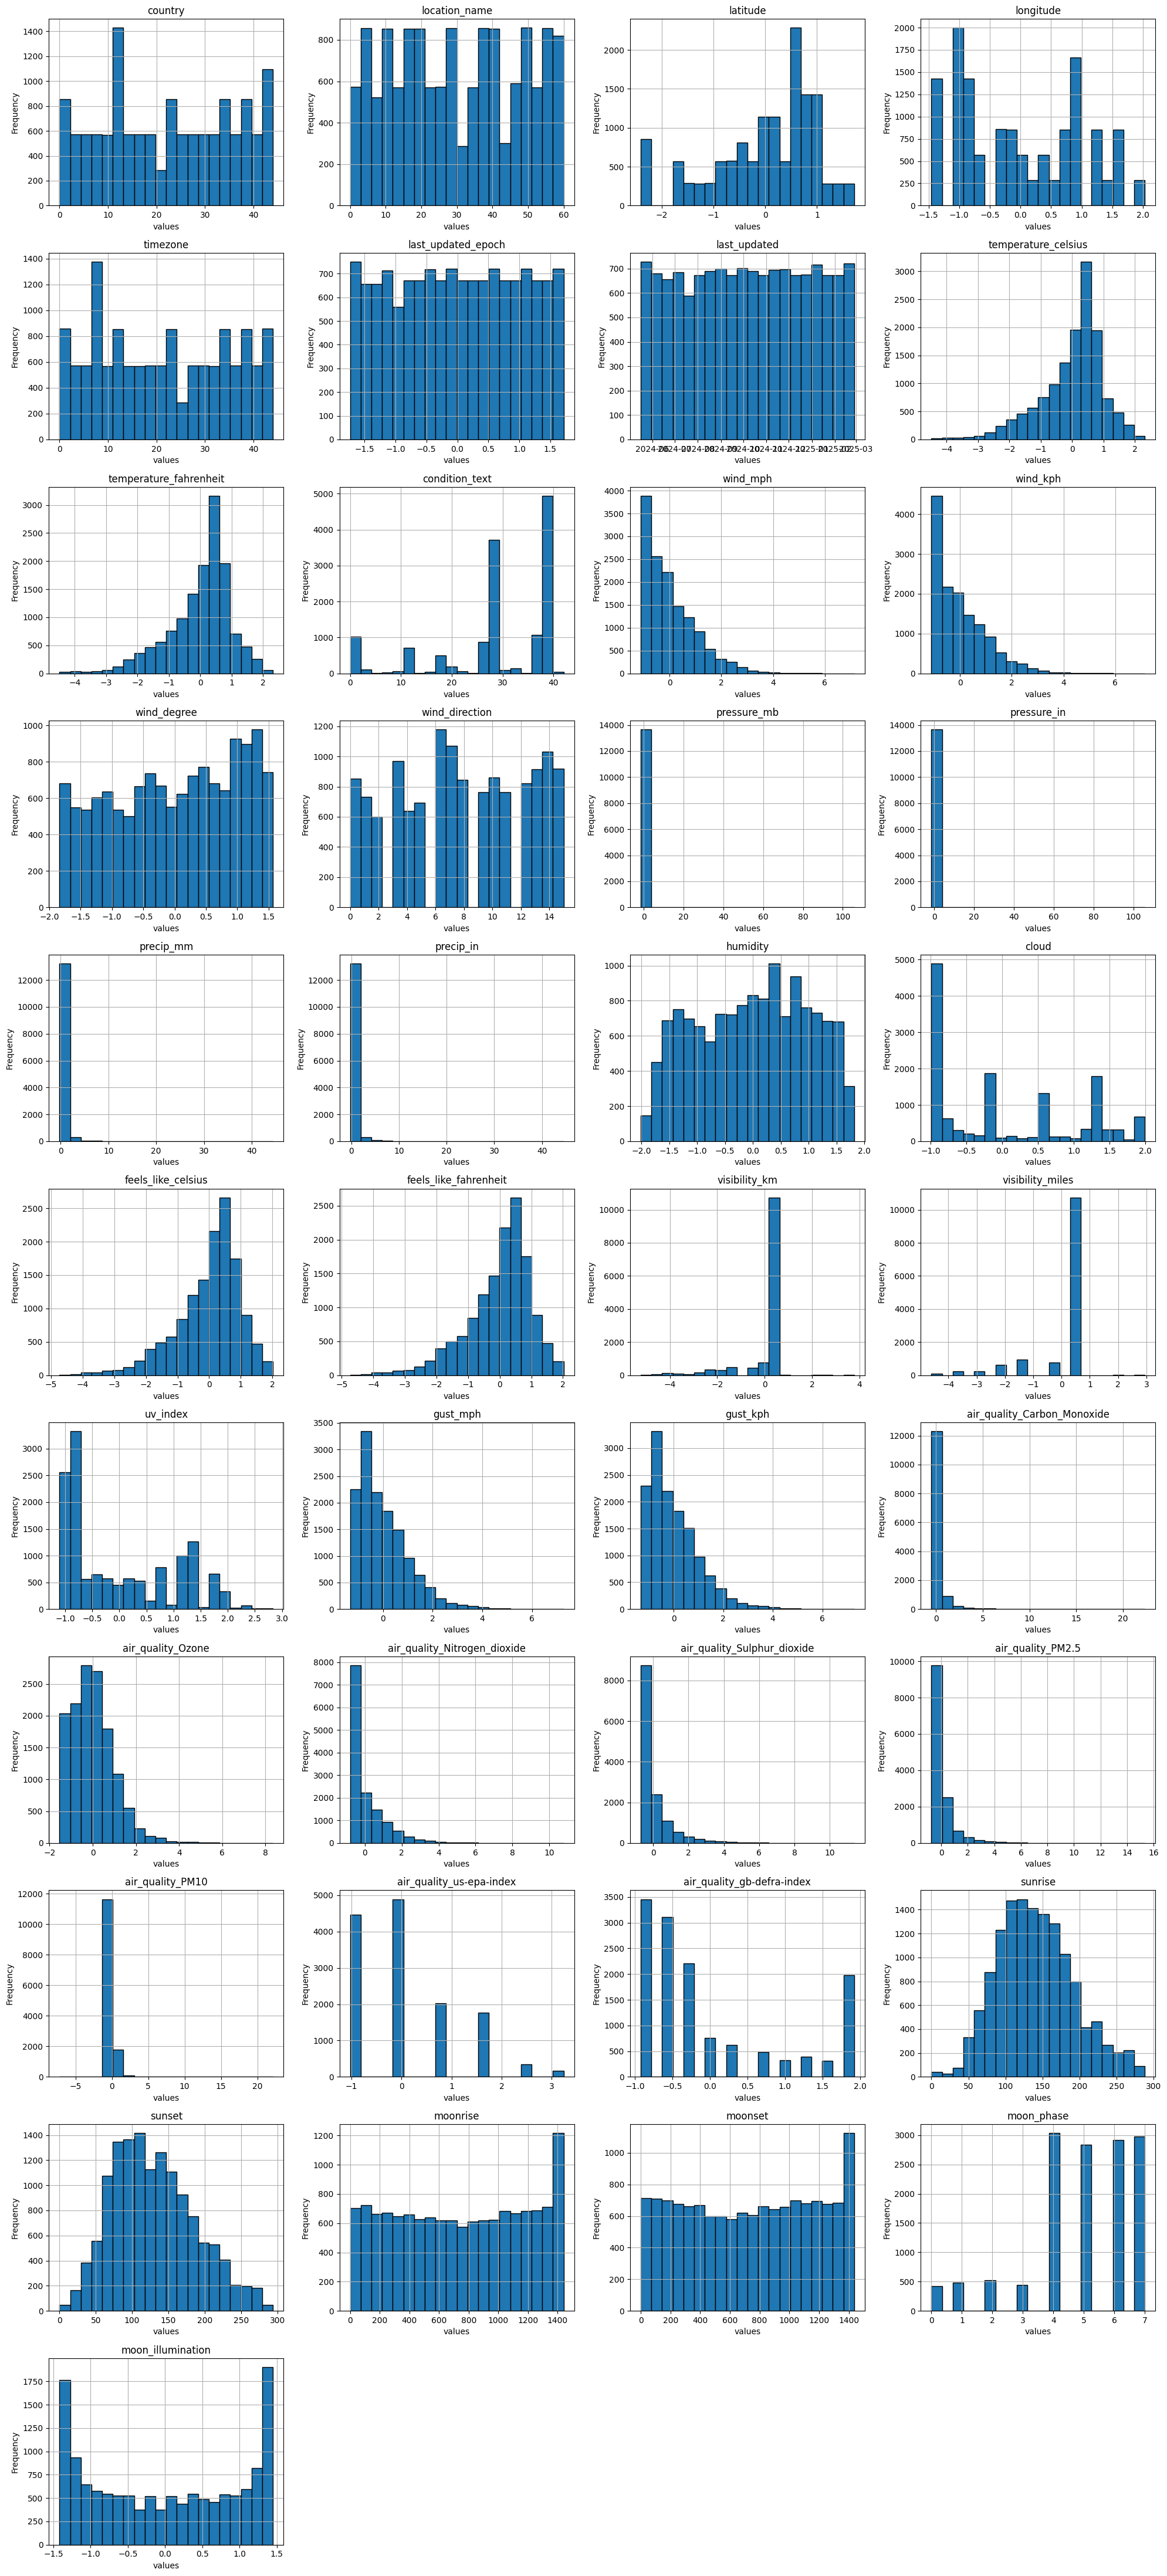

In [167]:
num_var = fix_asia_lencoder.shape[1]
n_cols = 4
n_rows = -(-num_var // n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for i, column in enumerate(fix_asia_lencoder.columns):
  fix_asia_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
  axes[i].set_title(column)
  axes[i].set_xlabel('values')
  axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

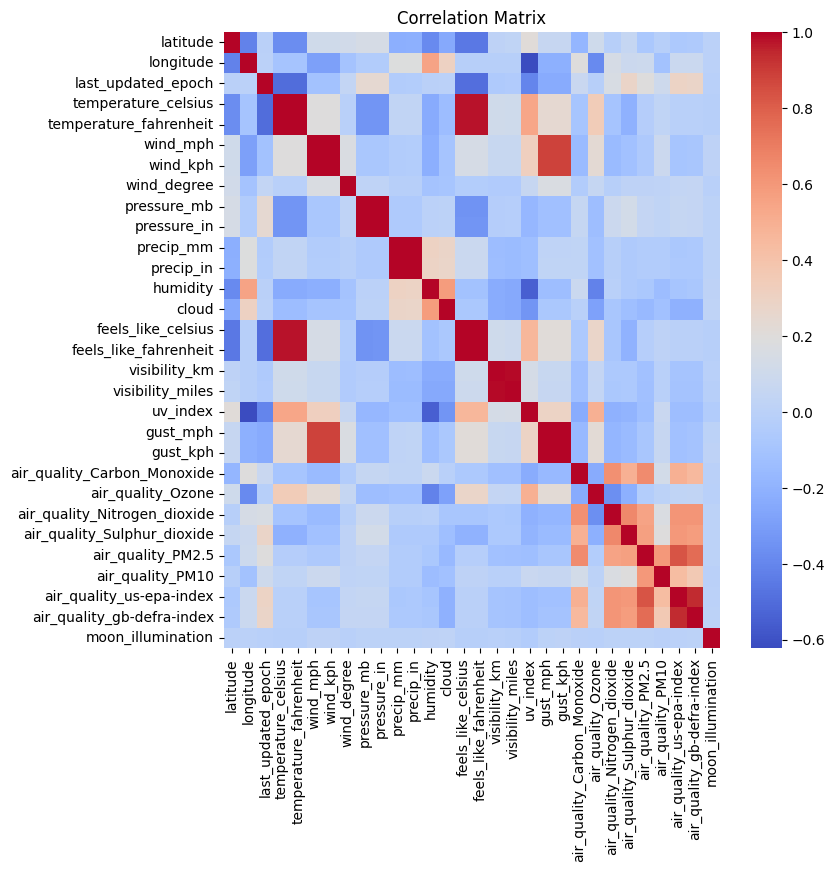

In [169]:
plt.figure(figsize=(8,8))
correlation_matrix = df_asia[numeric_features].corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()